In [8]:
import os
from nipype import Workflow, Node, Function


In [9]:


def sum(a, b):
    return a + b

wf = Workflow('hello')

adder = Node(Function(input_names=['a', 'b'],
                      output_names=['sum'],
                      function=sum), 
             name='a_plus_b')

adder.inputs.a = 1
adder.inputs.b = 3

wf.add_nodes([adder])

wf.base_dir = os.getcwd()

eg = wf.run()

eg.nodes()[0].result.outputs



170925-13:15:24,177 workflow INFO:
	 Workflow hello settings: ['check', 'execution', 'logging']
170925-13:15:24,180 workflow INFO:
	 Running serially.
170925-13:15:24,181 workflow INFO:
	 Executing node a_plus_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/a_plus_b



sum = 4

In [10]:


def concat(a, b):
    return [a, b]


concater = Node(Function(input_names=['a', 'b'],
                         output_names=['some_list'],
                         function=concat), 
                name='concat_a_b')

wf.connect(adder, 'sum', concater, 'a')
concater.inputs.b = 3

eg = wf.run()
print(eg.nodes())

# eg.nodes()[0].result.outputs

170925-13:15:25,552 workflow INFO:
	 Workflow hello settings: ['check', 'execution', 'logging']
170925-13:15:25,557 workflow INFO:
	 Running serially.
170925-13:15:25,558 workflow INFO:
	 Executing node a_plus_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/a_plus_b
170925-13:15:25,563 workflow INFO:
	 Executing node concat_a_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/concat_a_b
170925-13:15:25,564 workflow INFO:
[hello.a_plus_b, hello.concat_a_b]


In [11]:


eg.nodes()[-1].result.outputs




some_list = [4, 3]

In [12]:


def plus_one(a):
    print("PLUS ONE, a = {}".format(a))
    return a + 1

plusone = Node(Function(input_names=['a'],
                        output_names=['out'],
                        function=plus_one), 
               name='add_1')

wf.connect(concater, 'some_list', plusone, 'a')

eg = wf.run()
print(eg.nodes())



170925-13:15:29,463 workflow INFO:
	 Workflow hello settings: ['check', 'execution', 'logging']
170925-13:15:29,467 workflow INFO:
	 Running serially.
170925-13:15:29,468 workflow INFO:
	 Executing node a_plus_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/a_plus_b
170925-13:15:29,469 workflow INFO:
170925-13:15:29,470 workflow INFO:
	 Executing node concat_a_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/concat_a_b
170925-13:15:29,647 workflow INFO:
	 Executing node add_1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/add_1
PLUS ONE, a = [4, 3]
170925-13:15:29,793 workflow ERROR:
	 ['Node add_1 failed to run on host deepak-OptiPlex-9030-AIO.']
170925-13:15:29,806 workflow INFO:
	 Saving crash info to /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/crash-20170925-131529-deepak-add_1-685ecd1a-7e53-4d78-bbc4-af864cf3fac8.pklz
170925-13:15:29,807 workflow INFO:
	 Traceback (most recent call last):
  File "/home/deepak/anaconda3/lib/

RuntimeError: Workflow did not execute cleanly. Check log for details

In [13]:


!LC_ALL= nipypecli crash crash*





File: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/crash-20170925-131529-deepak-add_1-685ecd1a-7e53-4d78-bbc4-af864cf3fac8.pklz
Node: hello.add_1
Working directory: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/add_1


Node inputs:

a = [4, 3]
function_str = def plus_one(a):
    print("PLUS ONE, a = {}".format(a))
    return a + 1

ignore_exception = False



Traceback: 
Traceback (most recent call last):
  File "/home/deepak/anaconda3/lib/python3.6/site-packages/nipype/pipeline/plugins/linear.py", line 43, in run
    node.run(updatehash=updatehash)
  File "/home/deepak/anaconda3/lib/python3.6/site-packages/nipype/pipeline/engine/nodes.py", line 372, in run
    self._run_interface()
  File "/home/deepak/anaconda3/lib/python3.6/site-packages/nipype/pipeline/engine/nodes.py", line 482, in _run_interface
    self._result = self._run_command(execute)
  File "/home/deepak/anaconda3/lib/python3.6/site-packages/nipype/pipeline/engine/nodes.py", line 613, in _run_command
    r

In [14]:


from nipype import MapNode

plusone = MapNode(Function(input_names=['a'],
                           output_names=['out'],
                           function=plus_one), 
                  iterfield=['a'],
                  name='add_1')

wf = Workflow('hello_mapnode')

adder = Node(Function(input_names=['a', 'b'],
                      output_names=['sum'],
                      function=sum), 
             name='a_plus_b')

adder.inputs.a = 1
adder.inputs.b = 3
wf.connect(adder, 'sum', concater, 'a')
concater.inputs.b = 3

wf.connect(concater, 'some_list', plusone, 'a')

wf.base_dir = os.getcwd()

eg = wf.run()
print(eg.nodes())



170925-13:17:32,559 workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging']
170925-13:17:32,563 workflow INFO:
	 Running serially.
170925-13:17:32,564 workflow INFO:
	 Executing node a_plus_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/a_plus_b
170925-13:17:32,569 workflow INFO:
	 Executing node concat_a_b in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/concat_a_b
170925-13:17:32,570 workflow INFO:
170925-13:17:32,571 workflow INFO:
	 Executing node add_1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/add_1
170925-13:17:32,623 workflow INFO:
	 Executing node _add_10 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/add_1/mapflow/_add_10
PLUS ONE, a = 4
170925-13:17:32,630 workflow INFO:
	 Executing node _add_11 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/add_1/mapflow/_add_11
PLUS ONE, a = 3
[hello_mapnode.a_plus_b, hello.concat_a_b, hello_m

In [15]:


print(eg.nodes()[2].result.outputs)



Bunch(out=[5, 4])


In [16]:


adder.iterables = ('a', [1, 2])
adder.inputs.b = 2

eg = wf.run()
print(eg.nodes())



170925-13:18:36,18 workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging']
170925-13:18:36,28 workflow INFO:
	 Running serially.
170925-13:18:36,28 workflow INFO:
	 Executing node a_plus_b.aI.a1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/a_plus_b
170925-13:18:36,34 workflow INFO:
	 Executing node concat_a_b.a1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/_a_2/concat_a_b
170925-13:18:36,40 workflow INFO:
	 Executing node add_1.a1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/add_1
170925-13:18:36,43 workflow INFO:
	 Executing node _add_10 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/add_1/mapflow/_add_10
PLUS ONE, a = 4
170925-13:18:36,51 workflow INFO:
	 Executing node _add_11 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/add_1/mapflow/_add_11
PLUS ONE, a = 3
170925-13:18:36,58 workflow INFO:
	 Executing node a_pl

In [23]:
eg.nodes()[4].result.outputs


some_list = [4, 3]

In [27]:
wf.write_graph(graph2use='exec')

170925-13:27:07,195 workflow INFO:
	 Generated workflow graph: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/graph.dot.png (graph2use=exec, simple_form=True).


'/home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/graph.dot.png'

In [28]:
from IPython.display import Image

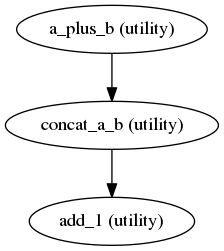

In [29]:
Image("hello_mapnode/graph.dot.png")

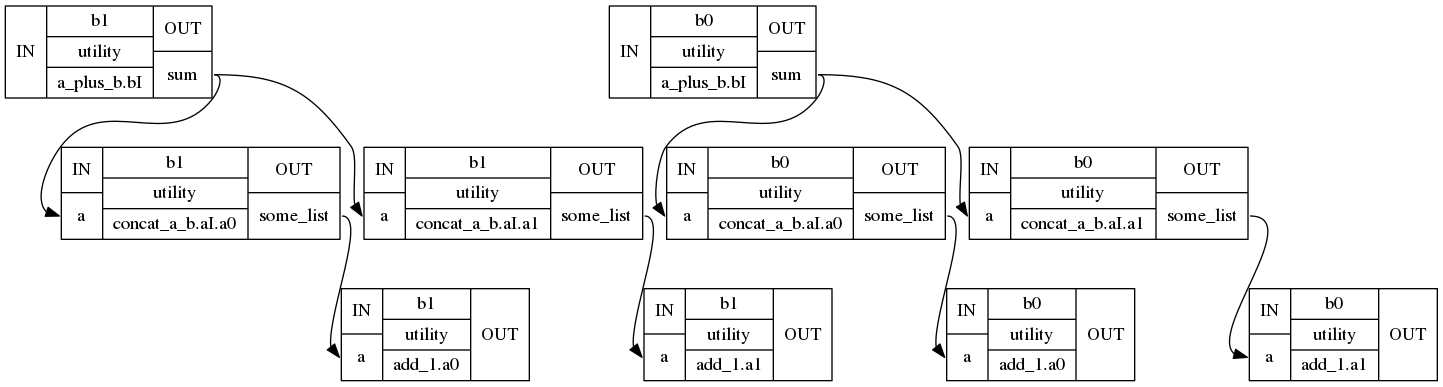

In [36]:
Image("hello_mapnode/graph_detailed.dot.png")

In [31]:
concater.iterables = ('b', [3, 4])
eg = wf.run()
eg.nodes()


170925-13:29:27,972 workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging']
170925-13:29:27,983 workflow INFO:
	 Running serially.
170925-13:29:27,984 workflow INFO:
	 Executing node a_plus_b.bI.b1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/a_plus_b
170925-13:29:27,985 workflow INFO:
170925-13:29:27,986 workflow INFO:
	 Executing node concat_a_b.aI.a0.b1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/_a_2/_b_3/concat_a_b
170925-13:29:27,991 workflow INFO:
	 Executing node add_1.a0.b1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/_b_3/add_1
170925-13:29:27,994 workflow INFO:
	 Executing node _add_10 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/_b_3/add_1/mapflow/_add_10
PLUS ONE, a = 4
170925-13:29:27,999 workflow INFO:
	 Executing node _add_11 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/_b_3/add_1/mapflow/_add_11


[hello_mapnode.a_plus_b.bI.b0,
 hello.concat_a_b.aI.a0.b0,
 hello_mapnode.add_1.a0.b0,
 hello.concat_a_b.aI.a1.b0,
 hello_mapnode.add_1.a1.b0,
 hello_mapnode.a_plus_b.bI.b1,
 hello.concat_a_b.aI.a0.b1,
 hello_mapnode.add_1.a0.b1,
 hello.concat_a_b.aI.a1.b1,
 hello_mapnode.add_1.a1.b1]

In [35]:
wf.write_graph(graph2use='exec')

170925-13:31:17,597 workflow INFO:
	 Generated workflow graph: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/graph.dot.png (graph2use=exec, simple_form=True).


'/home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/graph.dot.png'

In [37]:
def merge_and_scale_data(data2):
    import numpy as np
    return (np.array(data2) * 1000).tolist()


from nipype import JoinNode
joiner = JoinNode(Function(input_names=['data2'],
                          output_names=['data_scaled'],
                          function=merge_and_scale_data),
                 name='join_scale_data',
                 joinsource=adder,
                 joinfield=['data2'])

wf.connect(plusone, 'out', joiner, 'data2')

eg = wf.run()
eg.nodes()

170925-13:36:10,499 workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging']
170925-13:36:10,510 workflow INFO:
	 Running serially.
170925-13:36:10,510 workflow INFO:
	 Executing node a_plus_b.bI.b1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/a_plus_b
170925-13:36:10,512 workflow INFO:
170925-13:36:10,513 workflow INFO:
	 Executing node concat_a_b.aI.a0.b1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello/_a_2/_b_3/concat_a_b
170925-13:36:10,514 workflow INFO:
170925-13:36:10,516 workflow INFO:
	 Executing node add_1.a0.b1 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/_b_3/add_1
170925-13:36:10,519 workflow INFO:
	 Executing node _add_10 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapnode/_a_2/_b_3/add_1/mapflow/_add_10
PLUS ONE, a = 4
170925-13:36:10,525 workflow INFO:
	 Executing node _add_11 in dir: /home/deepak/Desktop/funcConn/funcConnGUI/Scripts/hello_mapno

[hello_mapnode.join_scale_data.a0,
 hello_mapnode.join_scale_data.a1,
 hello_mapnode.a_plus_b.bI.b0,
 hello.concat_a_b.aI.a0.b0,
 hello_mapnode.add_1.a0.b0,
 hello.concat_a_b.aI.a1.b0,
 hello_mapnode.add_1.a1.b0,
 hello_mapnode.a_plus_b.bI.b1,
 hello.concat_a_b.aI.a0.b1,
 hello_mapnode.add_1.a0.b1,
 hello.concat_a_b.aI.a1.b1,
 hello_mapnode.add_1.a1.b1]

In [41]:
eg.nodes()[0].result.outputs



data_scaled = [[4000, 4000], [5000, 4000]]